In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

The first step is to get rid of all null values.

In [468]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [469]:
df.yr_renovated = df.yr_renovated.fillna(df.yr_renovated.mean()) 

In [470]:
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront = df.waterfront.astype(float)

In [471]:
df.sqft_basement = df.sqft_basement.replace('?', 0)
df.sqft_basement = df.sqft_basement.astype(float)

In [472]:
df.view = df.view.fillna(0.0)

The following command makes sure there are no null values: 

In [473]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Clear. Now, it's time to make sure everything is the right data type. 

From what we can see above, we need floors, waterfront, view, yr_renovated, lat, and long should be integers and not floats. 

In [474]:
df.floors = df.floors.astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.lat = df.lat.astype(int)
df.long = df.long.astype(int)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null int64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null int64
long             21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 3.5+ MB


In [482]:
#corr = df.corr()
#sns.heatmap(corr)

sns.heatmap(df)

TypeError: isinstance() arg 2 must be a type or tuple of types

Now the data is clean, it is time to check for multicollinearity between values. This means the likliehood that dependent variable perdicts another dependent variable (as opposed to the independent variable). To do that, a heat map will be used. Very light colors indicates high multicollinearity 

TypeError: isinstance() arg 2 must be a type or tuple of types


From this heat graph, it's clear that not all of the features will be used in the model. Starting from the bottom of the y-axis, sqft_living15 has lots of dark red squares, meaning it's highly correlated with many other variables. Same with sqft_basement, sqft_above, grade, sqft_living, bathrooms and bedrooms. Floors is also very red.

It also appears that something is up with lat - from checking the unique values, it is clear that all of the houses in this county have the same latitute, which makes sense. It will be removed from the model. 

The resulting variables that will be used in this model are sqft_living, sqft_lot, waterfront, view, condition, yr_built, yr_renovated, zipcode, longitude, and sqft_lot15. Below, a new dataframe is created with these variables. 

In [465]:
kc_features = pd.DataFrame([])
kc_features["sqft_living"]= df.sqft_living
kc_features["sqft_lot"]= df.sqft_lot
kc_features["waterfront"] = df.waterfront
kc_features["view"] = df.view
kc_features["condition"] = df.condition
kc_features["yr_built"] = df.yr_built
kc_features["yr_renovated"] = df.yr_renovated
kc_features["zipcode"] = df.zipcode
kc_features["price"] = df.price
kc_features["waterfront"] = df.waterfront
kc_features["bedrooms"] = df.bedrooms
kc_features["bathrooms"] = df.bathrooms
kc_features["sqft_above"] = df.sqft_above
kc_features["sqft_living15"] = df.sqft_living15
kc_features["sqft_lot15"] = df.sqft_lot15
kc_features["bathrooms"] = df.bathrooms
#kc_features["zipcode"] = df.zipcode
#kc_features["sqft_basement"] = df.sqft_basement

TypeError: 'dict' object is not callable

In [462]:
kc_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 0 to 21596
Data columns (total 16 columns):
sqft_living           21583 non-null float64
sqft_lot              21583 non-null float64
waterfront            21583 non-null category
view                  21583 non-null float64
condition             21583 non-null float64
yr_built              21583 non-null int64
yr_renovated          21583 non-null int64
zipcode               21583 non-null int64
price                 21583 non-null float64
bedrooms              21583 non-null int64
bathrooms             21583 non-null float64
sqft_above            21583 non-null float64
sqft_living15         21583 non-null float64
sqft_lot15            21583 non-null float64
Age_of_house          21583 non-null int64
Age_of_renovations    21583 non-null int64
dtypes: category(1), float64(9), int64(6)
memory usage: 3.3 MB


Now, it's time explore the data - histograms will be made of each of the variables. 

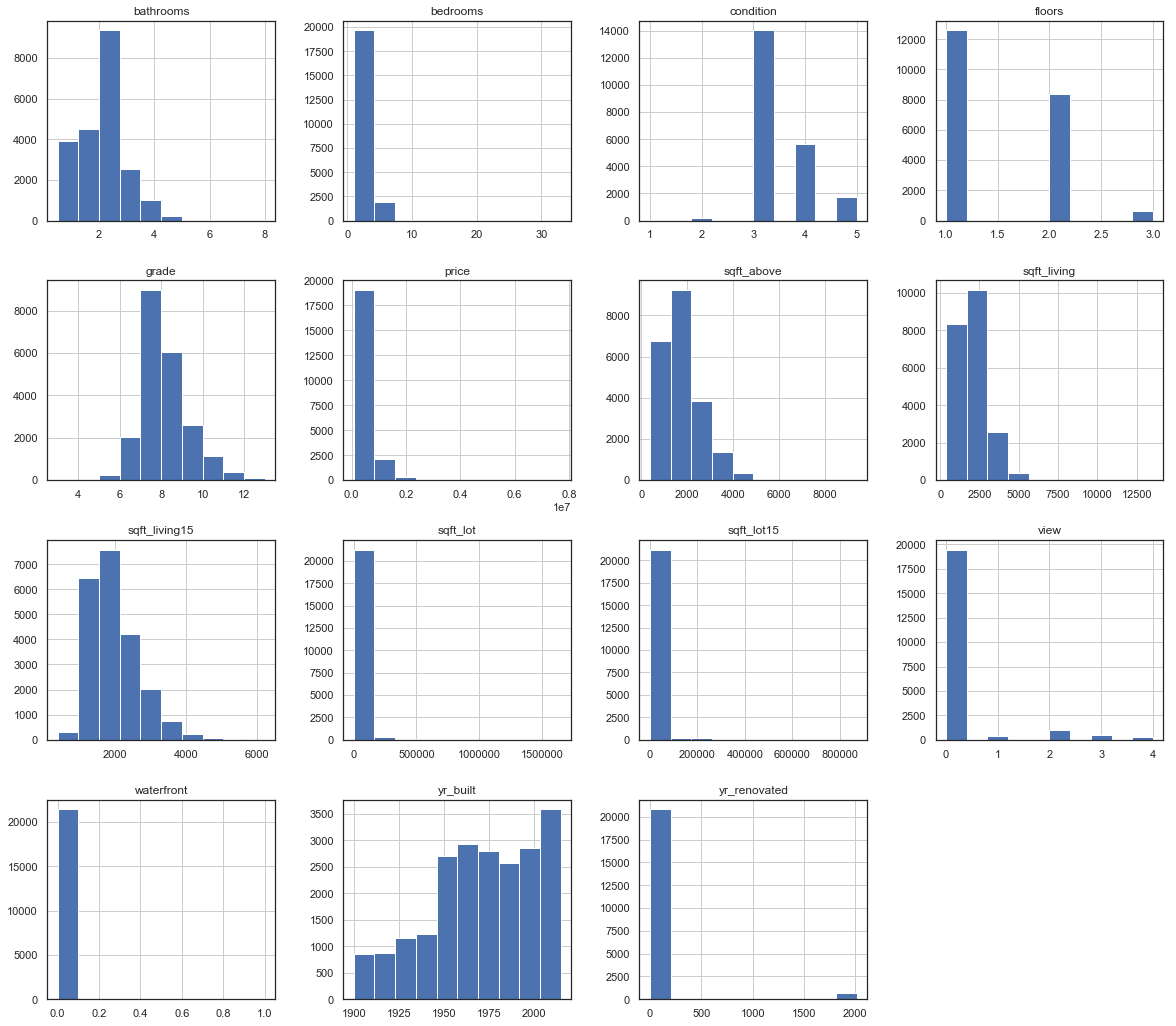

In [466]:
df.hist(figsize = (20,18));

From the histograms, it's clear that transformations need to be made, as well getting rid of outliers. "Bedrooms" is a clear example of outliers, "sqft_lot" is a good example of data that needs to be log transformed, and categorical variables such as "view" and "condition" will be min/maxed. 

Outliers:


In [483]:
df = df[df.bedrooms != 33]
df = df[df.bedrooms != 11]
df = df[df.bedrooms != 10]
df = df[df.bedrooms != 9]
df = df[df.bathrooms != 8]
df = df[df.bathrooms != 7.75]
df = df[df.bathrooms != 7.25]


Log Transformations:

In [484]:
df.sqft_living = np.log(df.sqft_living)
df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_above = np.log(df.sqft_above)
#kc_features.sqft_basement = np.log(kc_features.sqft_basement)
df.price = np.log(df.price)



Min Max Scaling: 

In [485]:
df.condition = (df.condition-min(df.condition))/(max(df.condition)-min(df.condition))	
df.view = (df.view-min(df.view))/(max(df.view)-min(df.view))	

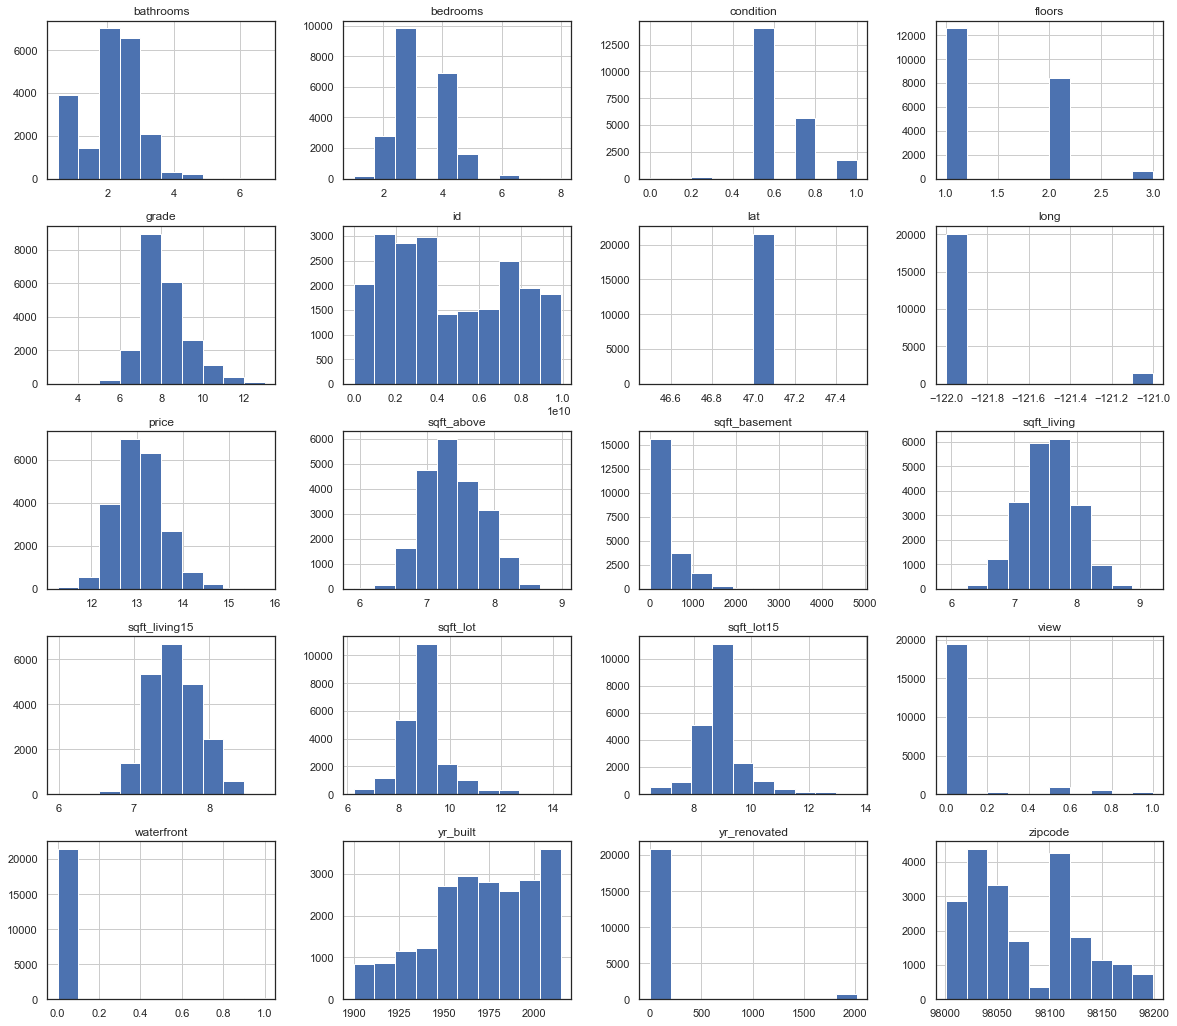

In [486]:
df.hist(figsize = (20,18));

The data looks good, with the exception of waterfront, yr_renovated, yr_built and zipcode. These need their own type of transformation based on the fact that they are not numerically related. 

For the yr_built, we will subtract the year from 2019:

In [488]:
df["Age_of_house"] = 2019 - df["yr_built"]
df["Age_of_renovations"] = 2019 - df["yr_renovated"]

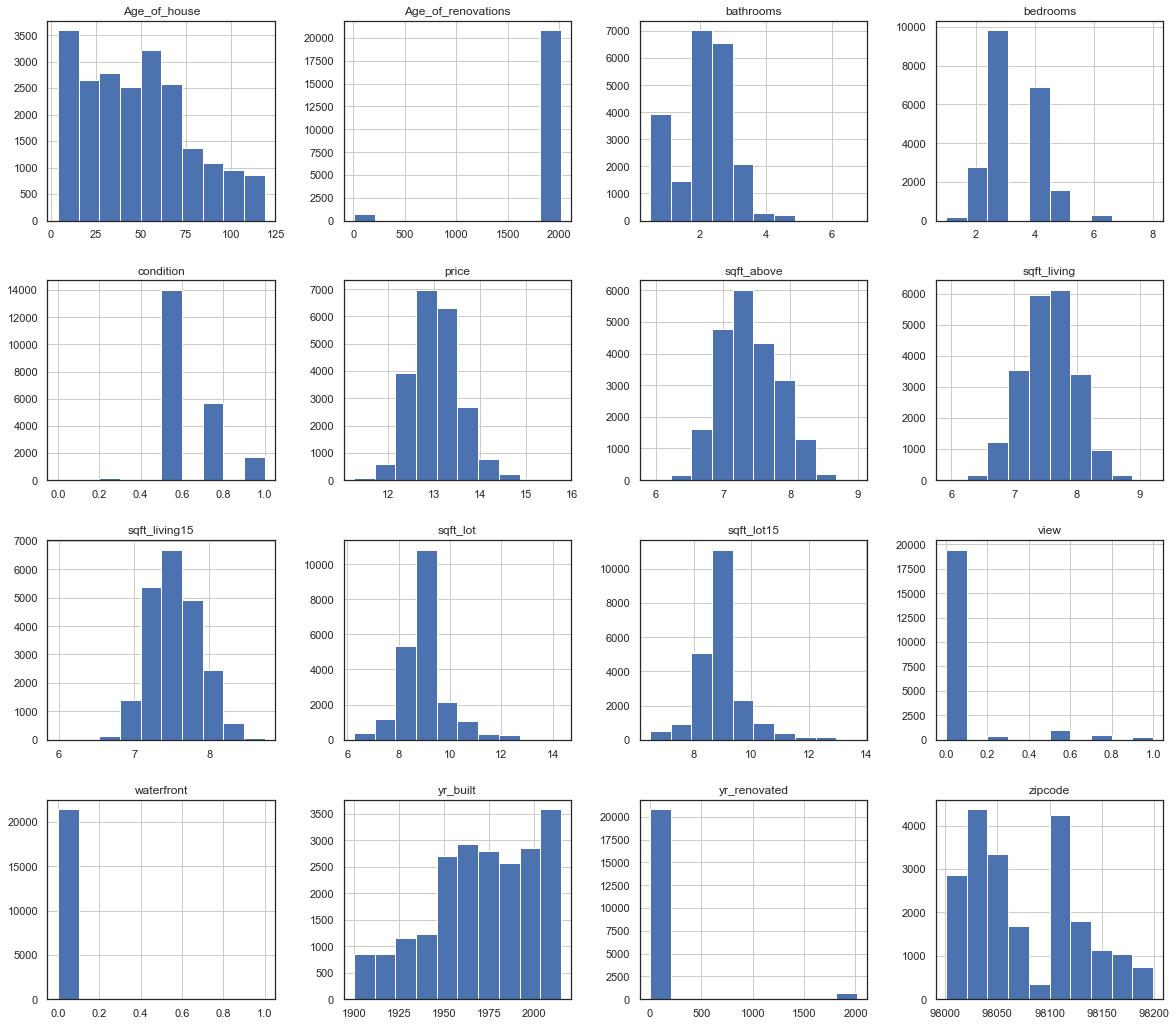

In [283]:
kc_features.hist(figsize = (20,18));

Next in transforming, is changing the variable type. "Waterfront" is a yes/no, so that should be a category. 

In [492]:
df.waterfront = df.waterfront.astype('category')

In [493]:
#bins = ['1900-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020']

#kc_features.yr_built = pd.cut(kc_features['yr_built'], 6, labels=bins)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 0 to 21596
Data columns (total 23 columns):
id                    21583 non-null int64
date                  21583 non-null object
price                 21583 non-null float64
bedrooms              21583 non-null int64
bathrooms             21583 non-null float64
sqft_living           21583 non-null float64
sqft_lot              21583 non-null float64
floors                21583 non-null int64
waterfront            21583 non-null category
view                  21583 non-null float64
condition             21583 non-null float64
grade                 21583 non-null int64
sqft_above            21583 non-null float64
sqft_basement         21583 non-null float64
yr_built              21583 non-null int64
yr_renovated          21583 non-null int64
zipcode               21583 non-null int64
lat                   21583 non-null int64
long                  21583 non-null int64
sqft_living15         21583 non-null float64
sqft_lot1

Now, it's time to run the model. From the above testing, it's apparent that ID, yr_renovated, yr_built, lat and long need to be removed. yr_renovated and yr_built are replaced with their "age" counterparts. 

In [495]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [502]:
data_fin = pd.concat([df.price, df.sqft_living, df.sqft_living15, df.sqft_above, df.sqft_lot, df.sqft_lot15, df.condition, df.view, df.waterfront, df.bedrooms, df.Age_of_house, df.Age_of_renovations], axis=1)

In [503]:
formula = "price ~ sqft_living+sqft_living15 + sqft_lot+ sqft_lot15+sqft_above+bedrooms+Age_of_house+Age_of_renovations+condition+view+waterfront + sqft_lot"
model = ols(formula= formula, data = df).fit()
model.summary()

TypeError: isinstance() arg 2 must be a type or tuple of types

All p-values are below .05, which means this data is significant. The R Squared value is .57, which on a scale from 0 (the model does not fit the data) to 1 (the model exactly fits the data), this falls somewhere in the middle. 

In [291]:
data_fin = pd.concat([df.price, df.sqft_living, df.sqft_living15, df.sqft_above, df.sqft_lot, df.sqft_lot15, df.condition, df.view, df.waterfront, df.bedrooms, df.Age_of_house], axis=1)

In [330]:
formula = "price ~ sqft_living+sqft_living15 + sqft_lot+ sqft_lot15 +sqft_above+bathrooms+Age_of_house+condition+view+waterfront + sqft_lot"
model = ols(formula= formula, data = data_fin).fit()
model.summary()




PatsyError: Error evaluating factor: NameError: name 'bathrooms' is not defined
    price ~ sqft_living+sqft_living15 + sqft_lot+ sqft_lot15+sqft_above+bathrooms+Age_of_house+condition+view+waterfront + sqft_lot
                                                                        ^^^^^^^^^

Now we will run recursive feature elimination to examine each varible's impact on the price of housing. We are looking for significant p values (below .05), and coefficents that are greater than .1. 

In [ ]:
import statsmodels.formula.api as smf

In [298]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("kc_features: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


kc_features: price~sqft_living
------------------------------
['sqft_living', 0.4541566082368288, 6.731407955665227, 0.8365659492279289, 0.0]
kc_features: price~sqft_lot
------------------------------
['sqft_lot', 0.01889986818355216, 12.327162878229608, 0.08014373063493363, 1.507865934977836e-91]
kc_features: price~view
------------------------------
['view', 0.11765175090591407, 12.992672902262415, 0.9445331913024394, 0.0]
kc_features: price~condition
------------------------------
['condition', 0.0015318185041158783, 12.971403993253125, 0.12652037361574742, 8.831861680002768e-09]
kc_features: price~yr_built
------------------------------
['yr_built', 0.006645179629701681, 10.17060203659615, 0.0014596665875416526, 3.7649152840571595e-33]
kc_features: price~yr_renovated
------------------------------
['yr_renovated', 0.011181011487057413, 13.034836614947265, 0.00015355922626989944, 1.0392077728403782e-54]
kc_features: price~zipcode
------------------------------
['zipcode', 0.00150323

In [295]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.454157,6.73141,0.836566,0
2,sqft_lot,0.0188999,12.3272,0.0801437,1.50787e-91
3,view,0.117652,12.9927,0.944533,0
4,condition,0.00153182,12.9714,0.12652,8.83186e-09
5,yr_built,0.00664518,10.1706,0.00145967,3.76492e-33
6,yr_renovated,0.011181,13.0348,0.000153559,1.03921e-54
7,zipcode,0.00150324,50.4033,-0.000380877,1.21358e-08
8,bedrooms,0.122915,12.353,0.206209,0
9,bathrooms,0.302421,12.248,0.378219,0


The standards for significance and model fit are an R-squared value <0.02 and P Value greater than .05. These are dropped, although it is important to note that all P Values are within the acceptable range. 

In [300]:
df2 = df.drop(["yr_renovated", "yr_built"], axis=1)

In [301]:
col_names = df2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("kc_features2: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_features).fit()
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


kc_features2: price~sqft_living
------------------------------
['sqft_living', 0.4541566082368288, 6.731407955665227, 0.8365659492279289, 0.0]
kc_features2: price~sqft_lot
------------------------------
['sqft_lot', 0.01889986818355216, 12.327162878229608, 0.08014373063493363, 1.507865934977836e-91]
kc_features2: price~view
------------------------------
['view', 0.11765175090591407, 12.992672902262415, 0.9445331913024394, 0.0]
kc_features2: price~condition
------------------------------
['condition', 0.0015318185041158783, 12.971403993253125, 0.12652037361574742, 8.831861680002768e-09]
kc_features2: price~zipcode
------------------------------
['zipcode', 0.0015032367533593938, 50.403308408091505, -0.0003808774676426647, 1.2135809161269305e-08]
kc_features2: price~bedrooms
------------------------------
['bedrooms', 0.12291545971530826, 12.352995830294015, 0.20620939424615187, 0.0]
kc_features2: price~bathrooms
------------------------------
['bathrooms', 0.3024213981791507, 12.248007

In [302]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.454157,6.73141,0.836566,0
2,sqft_lot,0.0188999,12.3272,0.0801437,1.50787e-91
3,view,0.117652,12.9927,0.944533,0
4,condition,0.00153182,12.9714,0.12652,8.83186e-09
5,zipcode,0.00150324,50.4033,-0.000380877,1.21358e-08
6,bedrooms,0.122915,12.353,0.206209,0
7,bathrooms,0.302421,12.248,0.378219,0
8,sqft_above,0.342229,7.71654,0.720933,0
9,sqft_living15,0.368169,5.70045,0.974509,0


In [310]:
col_names = df3.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("kc_features2: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df3).fit()
    X_new = pd.DataFrame({val: [df3[val].min(), df3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

kc_features2: price~sqft_living
------------------------------
['sqft_living', 0.4541566082368288, 6.731407955665227, 0.8365659492279289, 0.0]
kc_features2: price~zipcode
------------------------------
['zipcode', 0.0015032367533593938, 50.403308408091505, -0.0003808774676426647, 1.2135809161269305e-08]
kc_features2: price~bathrooms
------------------------------
['bathrooms', 0.3024213981791507, 12.248007663721758, 0.3782185589253012, 0.0]
kc_features2: price~sqft_above
------------------------------
['sqft_above', 0.3422290329491601, 7.716541122452437, 0.7209329633118208, 0.0]
kc_features2: price~sqft_living15
------------------------------
['sqft_living15', 0.36816888750395416, 5.700447420684712, 0.9745093459159992, 0.0]


In [311]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.454157,6.73141,0.836566,0
2,zipcode,0.00150324,50.4033,-0.000380877,1.21358e-08
3,bathrooms,0.302421,12.248,0.378219,0
4,sqft_above,0.342229,7.71654,0.720933,0
5,sqft_living15,0.368169,5.70045,0.974509,0


In [329]:
formula = "price ~ sqft_living+bathrooms+condition+view+waterfront+sqft_living15"
model = ols(formula= formula, data = kc_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3881.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:33:33   Log-Likelihood:                -8848.8
No. Observations:               21583   AIC:                         1.771e+04
Df Residuals:                   21576   BIC:                         1.777e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3689      0.073     87.067      0.000       6.226       6.512
waterfront[T.1]     0.3851      0.033     11.752      0.000       0.321       0.449
sqft_living         0.4960      0.011     44.155      0.000       0.474       0.518
bathrooms           0.0709      0.005     14.000      0.000       0.061       0.081
condition           0.2695      0.016     17.372      0.000       0.239       0.300
view                0.3976      0.015     27.240      0.000       0.369       0.426
sqft_living15       0.3443      0.012     29.836      0.000       0.322       0.367
==============================================================================
Omnibus:                      142.025   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.627
Skew:                           0.065   Prob(JB):                     1.91e-23
Kurtosis:                       2.685   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is the final model. 